<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/S1_Regression_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations Session 1: Regression and Analysis

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

In this session we will look at fitting data to a curve using **regression**. We will also look at using regression to make **predictions** for new data points by dividing our data into a training and a testing set. Finally we will examine how much error we make in our fit and then in our predictions by computing the mean squared error.

<br>

---



<a name='x.0'></a>

## 1.0 Preparing Environment and Importing Data

[back to top](#top)

<a name='x.0.1'></a>

### 1.0.1 Import Packages

[back to top](#top)

In [ ]:
# Import pandas, pyplot, ipywidgets
import pandas as pd  
from matplotlib import pyplot as plt
from ipywidgets import interact

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# for enrichment topics
import seaborn as sns
import numpy as np

### 1.0.2 Load Dataset

[back to top](#top)

For our discussion on regression and descriptive statistics today we will use a well known dataset of different wines and their quality ratings

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "ds_for_engineers/main/data/wine_quality/winequalityN.csv")
df.shape

(6497, 13)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 1.1 What is regression? 

It is the process of finding a relationship between **_dependent_** and **_independent_** variables to find trends in data. This abstract definition means that you have one variable (the dependent variable) which depends on one or more variables (the independent variables). One of the reasons for which we want to regress data is to understand whether there is a trend between two variables. 

**Housing Prices Example**

We can imagine this scenario with housing prices. Envision a **_mixed_** dataset of **_continuous_** and **_discrete_** independent variables. Some features could be continuous, floating point values like location ranking and housing condition. Others could be descrete like the number of rooms or bathrooms. We could take these features and use them to predict a house value. This would be a **_regression_** model.

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML3.png" width=1000px></img>
</p>






## 1.2  Linear regression fitting with scikit-learn

#### 🏋️ Exercise 1: rudimentary EDA
What does the data look like? Recall how to visualize data in a pandas dataframe 

<ul>
<li> for every column calculate the

  * skew: `df.skew()`
  * kurtosis: `df.kurtosis()`
  * pearsons correlation with the dependent variable: `df.corr()`
  * number of missing entries `df.isnull()`

and organize this into a new dataframe
</li>
</ul>

_note:_ pearsons is just one type of correlation, another available to us **_spearman_** which differs from pearsons in that it depends on ranked values rather than their direct quantities, you can read more [here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# Cell for Exercise 1

# part A 
# using df.<method> define the following four variables with the results from
# skew(), kurtosis(), corr() (and selecting for quality), and isnull()
# for isnull() you'll notice the return is a dataframe of booleans. we would
# like to simply know the number of null values for each column. change the
# return of isnull() using the sum() method

# skew =
# kurt =
# pear =
# null =

# part B
# on line 13, put these results in a list using square brackets and call 
# pandas.DataFrame on the list to make your new DataFrame! store it under the
# variable name dff



# part C
# take the transpose of this DataFrame using dff.T. reassign dff to this copy



# part D
# set the column names to 'skew', 'kurtosis', 'pearsons _quality', and 
# 'null count' using dff.columns



# Now return dff to the output to view your hand work
# dff

I have gone ahead and repeated this exercise with the red vs white wine types:

In [ ]:
red = df.loc[df['type'] == 'red']
wht = df.loc[df['type'] == 'white']

def get_summary(df):
  skew = df.skew()
  kurt = df.kurtosis()
  pear = df.corr()['quality']
  null = df.isnull().sum()
  med = df.median()
  men = df.mean()

  dff = pd.DataFrame([skew, kurt, pear, null, med, men])
  dff = dff.T
  dff.columns = ['skew', 'kurtosis', 'pearsons _quality', 'null count', 'median',
                'mean']
  return dff

dffr = get_summary(red)
dffw = get_summary(wht)

desc = pd.concat([dffr, dffw], keys=['red', 'white'])

In [ ]:
desc

skew   kurtosis  ...     median        mean
red   fixed acidity         0.982192   1.132624  ...    7.90000    8.322104
      volatile acidity      0.672862   1.226846  ...    0.52000    0.527738
      citric acid           0.317891  -0.788476  ...    0.26000    0.271145
      residual sugar        4.540655  28.617595  ...    2.20000    2.538806
      chlorides             5.680347  41.715787  ...    0.07900    0.087467
      free sulfur dioxide   1.250567   2.023562  ...   14.00000   15.874922
      total sulfur dioxide  1.515531   3.809824  ...   38.00000   46.467792
      density               0.071288   0.934079  ...    0.99675    0.996747
      pH                    0.194803   0.814690  ...    3.31000    3.310864
      sulphates             2.429115  11.712632  ...    0.62000    0.658078
      alcohol               0.860829   0.200029  ...   10.20000   10.422983
      quality               0.217802   0.296708  ...    6.00000    5.636023
      type                       NaN        NaN  ...        NaN         NaN
white fixed acidity         0.647981   2.176560  ...    6.80000    6.855532
      volatile acidity      1.578595   5.095526  ...    0.26000    0.278252
      citric acid           1.284217   6.182036  ...    0.32000    0.334250
      residual sugar        1.076601   3.469536  ...    5.20000    6.393250
      chlorides             5.023412  37.560847  ...    0.04300    0.045778
      free sulfur dioxide   1.406745  11.466342  ...   34.00000   35.308085
      total sulfur dioxide  0.390710   0.571853  ...  134.00000  138.360657
      density               0.977773   9.793807  ...    0.99374    0.994027
      pH                    0.458402   0.532552  ...    3.18000    3.188203
      sulphates             0.977361   1.589847  ...    0.47000    0.489835
      alcohol               0.487342  -0.698425  ...   10.40000   10.514267
      quality               0.155796   0.216526  ...    6.00000    5.877909
      type                       NaN        NaN  ...        NaN         NaN

[26 rows x 6 columns]

In [ ]:
def my_fig(metric=desc.columns):
  fig, ax = plt.subplots(1, 1, figsize=(10,10))
  pd.DataFrame(desc[metric]).unstack()[metric].T.plot(kind='barh', ax=ax)

In [ ]:
interact(my_fig)

interactive(children=(Dropdown(description='metric', options=('skew', 'kurtosis', 'pearsons _quality', 'null c…

<function __main__.my_fig>

#### 🙋 Question 1: Discussion Around EDA Plot

What do we think of this plot?

> `metric = mean`, the cholrides values <br>
`metric = kurtosis`, residual sugar <br>
`metric = pearsons _quality`, _magnitudes_ and _directions_ <br>
How to improve the plot, what other plots would we like to see?

In [ ]:
df['chlorides'].describe()

count    6495.000000
mean        0.056042
std         0.035036
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

(0.0, 0.61)

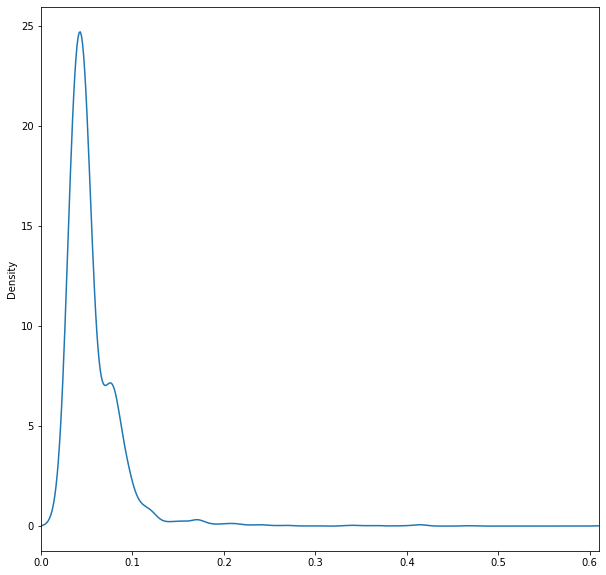

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df['chlorides'].plot(kind='kde',ax=ax)
ax.set_xlim(0,.61)

In [ ]:
df['chlorides'].sort_values(ascending=False)[:50]

5156    0.611
5049    0.610
5004    0.467
4979    0.464
5590    0.422
5652    0.415
6268    0.415
6270    0.415
6217    0.414
5949    0.414
5349    0.413
6158    0.403
4981    0.401
5628    0.387
6063    0.369
4915    0.368
5067    0.360
5179    0.358
484     0.346
5189    0.343
4917    0.341
5124    0.337
4940    0.332
1217    0.301
687     0.290
4473    0.271
5079    0.270
6272    0.267
5138    0.263
1865    0.255
5466    0.250
1034    0.244
5674    0.243
5675    0.241
683     0.240
1638    0.239
5045    0.236
6456    0.235
6468    0.230
5465    0.226
5464    0.226
5564    0.222
2186    0.217
5996    0.216
6332    0.214
6333    0.214
5206    0.214
5205    0.213
4497    0.212
1835    0.211
Name: chlorides, dtype: float64

### 1.2.2 Visualizing the data set - motivating regression analysis

We can create a scatter plot of fixed acidity vs density of red wine in the dataset using `df.plot()` and see that there appears to be a general trend between the two features:

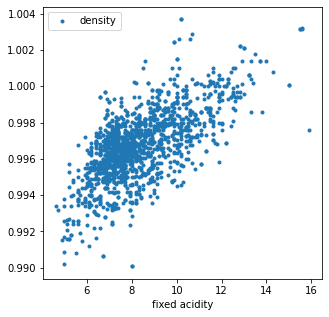

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
df.loc[df['type'] == 'red'].plot(x='fixed acidity', y='density', ax=ax, 
                                 ls='', marker='.')

### 1.2.3 Estimating the regression coefficients

It looks like density increases with fixed acidity following a line, maybe something like

$$y(x)= m \cdot x + b  \;\;\;\;\;\;\;\; \sf{eq. 1}$$ 

with \\( y=\sf density \\), \\(x=\sf fixed acidity\\), and \\(m\\) the slope and \\(b\\) the intercept. 

To solve the problem, we need to find the values of \\(b\\) and \\(m\\) in equation 1 to best fit the data. This is called **linear regression**.

In linear regression our goal is to minimize the error between computed values of positions \\(y^{\sf calc}(x_i)\equiv y^{\sf calc}_i\\) and known values \\(y^{\sf exact}(x_i)\equiv y^{\sf exact}_i\\), i.e. find \\(b\\) and \\(m\\) which lead to lowest value of

$$\epsilon (m,b) =SS_{\sf res}=\sum_{i=1}^{N}\left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2 = \sum_{i=1}^{N}\left(y^{\sf exact}_i - m\cdot x_i - b \right)^2\;\;\;\;\;\;\;\;\;\;\;\sf{eq. 2}$$

To find out more see e.g. https://en.wikipedia.org/wiki/Simple_linear_regression


#### 🙋 Question 2: linear regression loss function
> Do we always want *m* and *b* to be large positive numbers so as to minimize eq. 2? 


Luckily [scikit-learn](https://scikit-learn.org/stable/) contains many functions related to regression including [linear regression](https://scikit-learn.org/stable/modules/linear_model.html). 

The function we will use is called <code> LinearRegression() </code>. 

```
# Create linear regression object
model = linear_model.LinearRegression()

# Use model to fit to the data, the x values are densities and the y values are fixed acidity
# Note that we need to reshape the vectors to be of the shape x - (n_samples, n_features) and y (n_samples, n_targets)
x = red['density'].values.reshape(-1, 1)
y = red['fixed acidity'].values.reshape(-1, 1)
```

In [ ]:
# Create linear regression object
model = linear_model.LinearRegression()

# Use model to fit to the data, the x values are densities and the y values are fixed acidity
# Note that we need to reshape the vectors to be of the shape x - (n_samples, n_features) and y (n_samples, n_targets)
x = red['density'].values.reshape(-1, 1)
y = red['fixed acidity'].values.reshape(-1, 1)

```
print(red['density'].values.shape, red['fixed acidity'].values.shape)
print(x.shape, y.shape)
```

In [ ]:
print(red['density'].values.shape, red['fixed acidity'].values.shape)
print(x.shape, y.shape)

(1599,) (1599,)
(1599, 1) (1599, 1)


```
# Fit to the data
model.fit(x, y)

# Extract the values of interest
m = model.coef_[0][0]
b = model.intercept_[0]

# Print the slope m and intercept b
print('Scikit learn - Slope: ', m , 'Intercept: ', b )
```

What happens when we try to fit the data as is?

In [ ]:
# Fit to the data
# model.fit(x, y)

#### 🏋️ Exercise 2: drop Null Values (and practice pandas operations)

Let's look back at our dataset description dataframe above, what do we notice, what contains null values?

There are several strategies for dealing with null values. For now let's take the simplest case, and drop rows in our dataframe that contain null

In [ ]:
# Cell for Exercise 2
# For this templated exercise you are going to complete everything in one line 
# of code, but we are going to break it up into steps. So for each part (A, B,
# etc.) paste your answer from the previous part to begin

# step A
# select the 'density' and 'fixed acidity' columns of red. make sure the return
# is a dataframe

# step B
# now use the dropna() method on axis 0 (the rows) to drop any null values 

# step B
# select column 'density'

# step C
# select the values

# step D
# reshape the result with an empty second dimension using .reshape() and store
# the result under variable x

# repeat the same process with 'fixed acidity' and variable y

Now that we have our x and y arrays we can fit using ScikitLearn

In [ ]:
x = red[['density', 'fixed acidity']].dropna(axis=0)['density'].values.reshape(-1,1)
y = red[['density', 'fixed acidity']].dropna(axis=0)['fixed acidity'].values.reshape(-1,1)

In [ ]:
# Fit to the data
model.fit(x, y)

# Extract the values of interest
m = model.coef_[0][0]
b = model.intercept_[0]

# Print the slope m and intercept b
print('Scikit learn - Slope: ', m , 'Intercept: ', b )

Scikit learn - Slope:  616.0131428066102 Intercept:  -605.6880086750525


#### 🏋️ Exercise 3: calculating y_pred
Estimate the values of \\(y\\) by using your fitted parameters. Hint: Use your <code>model.coef_</code> and <code>model.intercept_</code> parameters to estimate y_pred following equation 1


In [ ]:
# define y_pred in terms of m, x, and b
# y_pred = 

# fig, ax = plt.subplots(1,1, figsize=(10,10))
# ax.plot(x, y_pred, ls='', marker='*')
# ax.plot(x, y, ls='', marker='.')

We can also return predictions directly with the model object using the predict() method

In [ ]:
# Another way to get this is using the model.predict function
y_pred = model.predict(x)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(x, y_pred, ls='', marker='*')
ax.plot(x, y, ls='', marker='.')

## 1.3 Error and topics of model fitting (assessing model accuracy)

### 1.3.1 Measuring the quality of fit

#### 1.3.1.1 Mean Squared Error

The plot in Section 1.2.3 looks good, but numerically what is our error? What is the mean value of $\epsilon$, i.e. the **Mean Squared Error (MSE)**?

$${\sf MSE}=\epsilon_{\sf ave} = \frac{\sum_{i=1}^{N_{\sf times}}\left(y^{\sf exact}_i - m\cdot t_i - b \right)^2}{N_{\sf times}}\;\;\;\;\;\sf eq. 3$$

```
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
```

In [ ]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))

#### 1.3.1.2 R-square

Another way to measure error is the regression score, \\(R^2\\). \\(R^2\\) is generally defined as the ratio of the total sum of squares \\(SS_{\sf tot}\\) to the residual sum of squares \\(SS_{\sf res}\\):

$$SS_{\sf tot}=\sum_{i=1}^{N} \left(y^{\sf exact}_i-\bar{y}\right)^2\;\;\;\;\; \sf eq. 4$$
$$SS_{\sf res}=\sum_{i=1}^{N} \left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2\;\;\;\;\; \sf eq. 5$$
$$R^2 = 1 - {SS_{\sf res}\over SS_{\sf tot}} \;\;\;\;\;\; \sf eq. 6$$

In eq. 4, \\(\bar{y}=\sum_i y^{\sf exact}_i/N\\) is the average value of y for \\(N\\) points. The best value of \\(R^2\\) is 1 but it can also take a negative value if the error is large.

See all the different regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

#### 🙋 Question 3
> Do we need a large value of \\(SS_{\sf tot}\\) to minimize \\(R^2\\) - is this something which we have the power to control?

```
# Print the coefficient of determination - 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))
```

In [ ]:
# Print the coefficient of determination - 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

### 1.3.2 Corollaries with classification models

For classification tasks, we typically assess accuracy vs MSE or R-square, since we are dealing with categorical rather than numerical predictions.

What is accuracy? It is defined as the ratio of True assignments to all assignments. For a binary positive/negative classification task this can be written as the following:

$$ Acc = \frac{T_p + T_n}{F_p + F_n + T_p + T_n} $$

Where \\(T\\) is True, \\(F\\) is false, \\(p\\) is positive, \\(n\\) is negative

Just as a quick example, we can perform this type of task on our wine dataset by predicting on quality, which is a discrete 3-9 quality score:

In [ ]:
y_train = df['type'].values.reshape(-1,1)
x_train = df['quality'].values.reshape(-1,1)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(x_train, y_train)

In [ ]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_train)

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_pred_class))

### 1.3.3 Beyond a single input feature

(_also: quick appreciative beat for folding in domain area expertise into our models and features_)

The **acidity** of the wine (the dependent variable v) could depend on:

* potassium from the soil (increases alkalinity)
* unripe grapes (increases acidity)
* grapes grown in colder climates or reduced sunshine create less sugar (increases acidity)
* preprocessing such as adding tartaric acid to the grape juice before fermentation (increases acidity)
* malolactic fermentation (reduces acidity)
* \+ others

So in our lab today we will look at folding in additional variables in our dataset into the model
<hr style="border:1px solid grey"> </hr>


## 1.4 Multivariate regression

Let's now turn our attention to wine quality.

The value we aim to predict or evaluate is the quality of each wine in our dataset. This is our dependent variable. We will look at how this is related to the 12 other independent variables, also known as *input features*. We're going to do this is just the red wine data

In [ ]:
red.head()

### 1.4.1 Linear regression with all input fields

For this example, notice we have a categorical data variable in the 'type' column. We will ignore this for now, and only work with our red wines. In the future we will discuss how to deal with categorical variable such as this in a mathematical representation.

In [ ]:
# this is a list of all our features or independent variables
features = list(red.columns[1:])

# we're going to remove our target or dependent variable, density from this
# list
features.remove('density')

# now we define X and y according to these lists of names
X = red.dropna(axis=0)[features].values
y = red.dropna(axis=0)['density'].values

In [ ]:
red.isnull().sum(axis=0) # we are getting rid of some nasty nulls!



```
# Create linear regression object - note that we are using all the input features
model = linear_model.LinearRegression()
model.fit(X, y)
y_calc = model.predict(X)
```



In [ ]:
# Create linear regression object - note that we are using all the input features
model = linear_model.LinearRegression()
model.fit(X, y)
y_calc = model.predict(X)

Let's see what the coefficients look like ... 

```
print("Fit coefficients: \n", model.coef_, "\nNumber of coefficients:", len(model.coef_))
```

In [ ]:
print("Fit coefficients: \n", model.coef_, "\nNumber of coefficients:", len(model.coef_))

We have 11 !!! That's because we are regressing respect to all **11 independent variables**!!!

So now, $$y_{\sf calc}= m_1x_1 +\, m_2x_2 \,+ \,m_3x_3 \,+\,... \,+ \,b =\sum_{i=1}^{13}m_i x_i + b\;\;\;\;\; \sf eq. 7$$

```
print("We have 13 slopes / weights:\n\n", model.coef_)
print("\nAnd one intercept: ", model.intercept_)
```

In [ ]:
print("We have 11 slopes / weights:\n\n", model.coef_)
print("\nAnd one intercept: ", model.intercept_)

```
# This size should match the number of columns in X
if len(X[0]) == len(model.coef_):
    print("All good! The number of coefficients matches the number of input features.")
else:
    print("Hmm .. something strange is going on.")
```

In [ ]:
# This size should match the number of columns in X
if len(X[0]) == len(model.coef_):
    print("All good! The number of coefficients matches the number of input features.")
else:
    print("Hmm .. something strange is going on.")

### 🏋️ Exercise 4: evaluate the error

Let's **evaluate the error** by computing the MSE and \\(R^2\\) metrics (see eq. 3 and 6).

```
# The mean squared error

# part A 
# calculate the MSE using mean_squared_error()
# mse = 

# part B
# calculate the R square using r2_score()
# r2 = 

print('Mean squared error: {:.2f}'.format(mse)
print('Coefficient of determination: {:.2f}'.format(r2)
```

In [ ]:
# The mean squared error

# part A 
# calculate the MSE using mean_squared_error()
# mse = 

# part B
# calculate the R square using r2_score()
# r2 = 

print('Mean squared error: {:.2f}'.format(mse)
print('Coefficient of determination: {:.2f}'.format(r2)

### 🏋️ Exercise 5: make a plot of y actual vs y predicted

We can also look at how well the computed values match the true values graphically by generating a scatterplot.

```
# generate a plot of y predicted vs y actual using plt.plot()
# remember you must set ls to an empty string and marker to some marker style

# plt.plot()
plt.title("Linear regression - computed values on entire data set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()
```

In [ ]:
# generate a plot of y predicted vs y actual using plt.plot()
# remember you must set ls to an empty string and marker to some marker style

# plt.plot()
plt.title("Linear regression - computed values on entire data set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()

### 1.4.2 **Enrichment**: Splitting into train and test sets

To see whether we can predict, we will carry out our regression only on a part, 80%, of the full data set. This part is called the **training** data. We will then test the trained model to predict the rest of the data, 20% - the **test** data. The function which fits won't see the test data until it has to predict it. 

**We will motivate the use of train/test sets more explicitly in Course 2 Session 1**

We start by splitting out data using scikit-learn's <code> train_test_split() </code> function:

```
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42)
                                                    ```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42)

Now we check the size of <code> y_train </code> and <code> y_test </code>, the sum should be the size of y! If this works then we move on and carry out regression but we only use the training data!

```
if len(y_test)+len(y_train) == len(y):
    
    print('All good, ready to to go and regress!\n')
    
    # Carry out linear regression
    print('Running linear regression algorithm on the training set\n')
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    print('Fit coefficients and intercept:\n\n', model.coef_, '\n\n', model.intercept_ )

    # Predict on the test set
    y_pred_test = model.predict(X_test)
```

In [ ]:
if len(y_test)+len(y_train) == len(y):
    
    print('All good, ready to to go and regress!\n')
    
    # Carry out linear regression
    print('Running linear regression algorithm on the training set\n')
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    print('Fit coefficients and intercept:\n\n', model.coef_, '\n\n', model.intercept_ )

    # Predict on the test set
    y_pred_test = model.predict(X_test)

Now we can plot our predicted values to see how accurate we are in predicting. We will generate a scatterplot and computing the MSE and \\(R^2\\) metrics of error.

```
sns.scatterplot(x=y_pred_test, y=y_test, color="mediumvioletred", s=50)

plt.title("Linear regression - predict test set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_test))
```

In [ ]:
sns.scatterplot(x=y_pred_test, y=y_test, color="mediumvioletred", s=50)

plt.title("Linear regression - predict test set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred_test))

#### 1.4.2.1 Other data considerations

* Do we need all the independent variables? 
  * Topics of interential statistics covered in a couple sessions

* Can we output integer quality scores? 
  * Topics of non-binary classification tasks covered in week 4

### 1.4.3 **Enrichment**: Other regression algorithms

There are many other regression algorithms the two we want to highlight here are Ridge, LASSO, and Elastic Net. They differ by an added term to the loss function. Let's review. Eq. 2 expanded to multivariate form yields:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2$$

for Ridge regression, we add a **_regularization_** term known as **_L2_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}\beta_{j}^2$$

for **_LASSO_** (Least Absolute Shrinkage and Selection Operator) we add **_L1_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}|\beta_{j}|$$

The key difference here is that LASSO will allow coefficients to shrink to 0 while Ridge regression will not. **_Elastic Net_** is a combination of these two regularization methods.


```
model = linear_model.Ridge()
model.fit(X_train, y_train)
print('Fit coefficients and intercept:\n\n', model.coef_, '\n\n', model.intercept_ )

# Predict on the test set
y_calc_test = model.predict(X_test)
```

In [ ]:
model = linear_model.Ridge()
model.fit(X_train, y_train)
print('Fit coefficients and intercept:\n\n', model.coef_, '\n\n', model.intercept_ )

# Predict on the test set
y_calc_test = model.predict(X_test)

```
sns.scatterplot(x=y_calc_test, y=y_test, color="lightseagreen", s=50)
plt.title("Ridge regression - predict test set",fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_calc_test))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_calc_test))
```

In [ ]:
sns.scatterplot(x=y_calc_test, y=y_test, color="lightseagreen", s=50)
plt.title("Ridge regression - predict test set",fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_calc_test))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_calc_test))

#### 🏋️ Exercise 6: Tune Hyperparameter for Ridge Regression

Use the docstring to peak into the hyperparameters for Ridge Regression. What is the optimal value of lambda?

Plot the \\(\beta\\) values vs \\(\lambda\\) from the results of your analysis

In [ ]:
# cell for exercise 3
out_lambdas = []
out_coefs = []
out_scores = []
for i in range(10):
  lambdas = []
  coefs = []
  scores = []
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)
  for lamb in range(1,110):
    model = linear_model.Ridge(alpha=lamb/50, normalize=True)
    model.fit(X_train, y_train)
    lambdas.append(lamb)
    coefs.append(model.coef_)
    scores.append(r2_score(y_test, model.predict(X_test)))
    # print('MSE: %.4f' % mean_squared_error(y_test, model.predict(X_test)))
    # print('R2: %.4f' % r2_score(y_test, model.predict(X_test)))
  out_lambdas.append(lambdas)
  out_coefs.append(coefs)
  out_scores.append(scores)

In [ ]:
coef_means = np.array(out_coefs).mean(axis=0)
coef_stds = np.array(out_coefs).std(axis=0)
results_means = pd.DataFrame(coef_means,columns=features)
results_stds = pd.DataFrame(coef_stds,columns=features)
results_means['lambda'] = [i/50 for i in lambdas]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
for feat in features:
  ax.errorbar([i/50 for i in lambdas], results_means[feat], yerr=results_stds[feat], label=feat)
# results.plot('lambda', 'scores', ax=ax[1])
ax.legend()

In [ ]:
results = pd.DataFrame(coefs,columns=features)
results['lambda'] = [i/50 for i in lambdas]
results['scores'] = scores

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for feat in features:
  results.plot('lambda', feat, ax=ax[0])
results.plot('lambda', 'scores', ax=ax[1])

## 1.5 **Enrichment**: Additional Regression Exercises


### Problem 1) Number and choice of input features

* Load the red wine dataset and evaluate how the linear regression predictions changes as you change the **number and choice of input features**. The total number of columns in X  is 11 and each column represent a specific input feature. 

* Estimate the MSE
```
print(X_train.shape)
```

In [ ]:
print(X_train.shape)

If you want to use the first 5 features you could proceed as following:

```
X_train_five = X_train[:,0:5]
X_test_five = X_test[:,0:5]
```

In [ ]:
X_train_five = X_train[:,0:5]
X_test_five = X_test[:,0:5]

Check that the new variables have the shape your expect

```
print(X_train_five.shape)
print(X_test_five.shape)
```

In [ ]:
print(X_train_five.shape)
print(X_test_five.shape)

Now you can use these to train your linear regression model and repeat for different numbers or sets of input features! Note that you do not need to change the output feature! It's size is independent from the number of input features, yet recall that its length is the same as the number of values per input feature.

Questions to think about while you work on this problem
- How many input feature variables does one need? Is there a maximum or minimum number? 
- Could one input feature variable be better than the rest?
- What if values are missing for one of the input feature variables - is it still worth using it?
- Can you use **_L1_** or **_L2_** to determine these optimum features more quickly?

### Problem 2) Type of regression algorithm


Try using other types of linear regression methods on the wine dataset: the LASSO model and the Elastic net model which are described by the 

<code > sklearn.linear_model.ElasticNet() </code> <br>
<code > sklearn.linear_model.Lasso() </code>

scikit-learn functions.

For more detail see [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and [Lasso](  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).

Questions to think about while you work on this problem
- How does the error change with each model?
- Which model seems to perform best?
- How can you optimize the hyperparameter, \\(\lambda\\)
- Does one model do better than the other at determining which input features are more important?
- How about non linear regression / what if the data does not follow a line?
- How do the bias and variance change for each model

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [ ]:
for model in [ElasticNet, Lasso, Ridge, LinearRegression]:
  model = model()
  model.fit(X_train, y_train)
  print('Mean squared error: %.2f' % mean_squared_error(y_test, model.predict(X_test)))
  print('Coefficient of determination: %.2f' % r2_score(y_test, model.predict(X_test)))

<hr style="border:1px solid grey"> </hr>

# References

* **Linear Regression**
To find out more see [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

* **scikit-learn**
    * [Scikit-learn](https://scikit-learn.org/stable/)
    * [Linear regression in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    * [Metrics of error](https://scikit-learn.org/stable/modules/model_evaluation.html)
    * [The Boston dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

* **Pearson correlation**
To find out more see [pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

* **Irreducible error, bias and variance**
    * Great Coursera videos [here](https://www.coursera.org/lecture/ml-regression/irreducible-error-and-bias-qlMrZ)
and [here](https://www.coursera.org/lecture/ml-regression/variance-and-the-bias-variance-tradeoff-ZvP40)
